# CURSO: MINERIA DE DATOS             
# ALUMNO: HUILLCA MOZO, BRYAN   
# CODIGO: 160329                

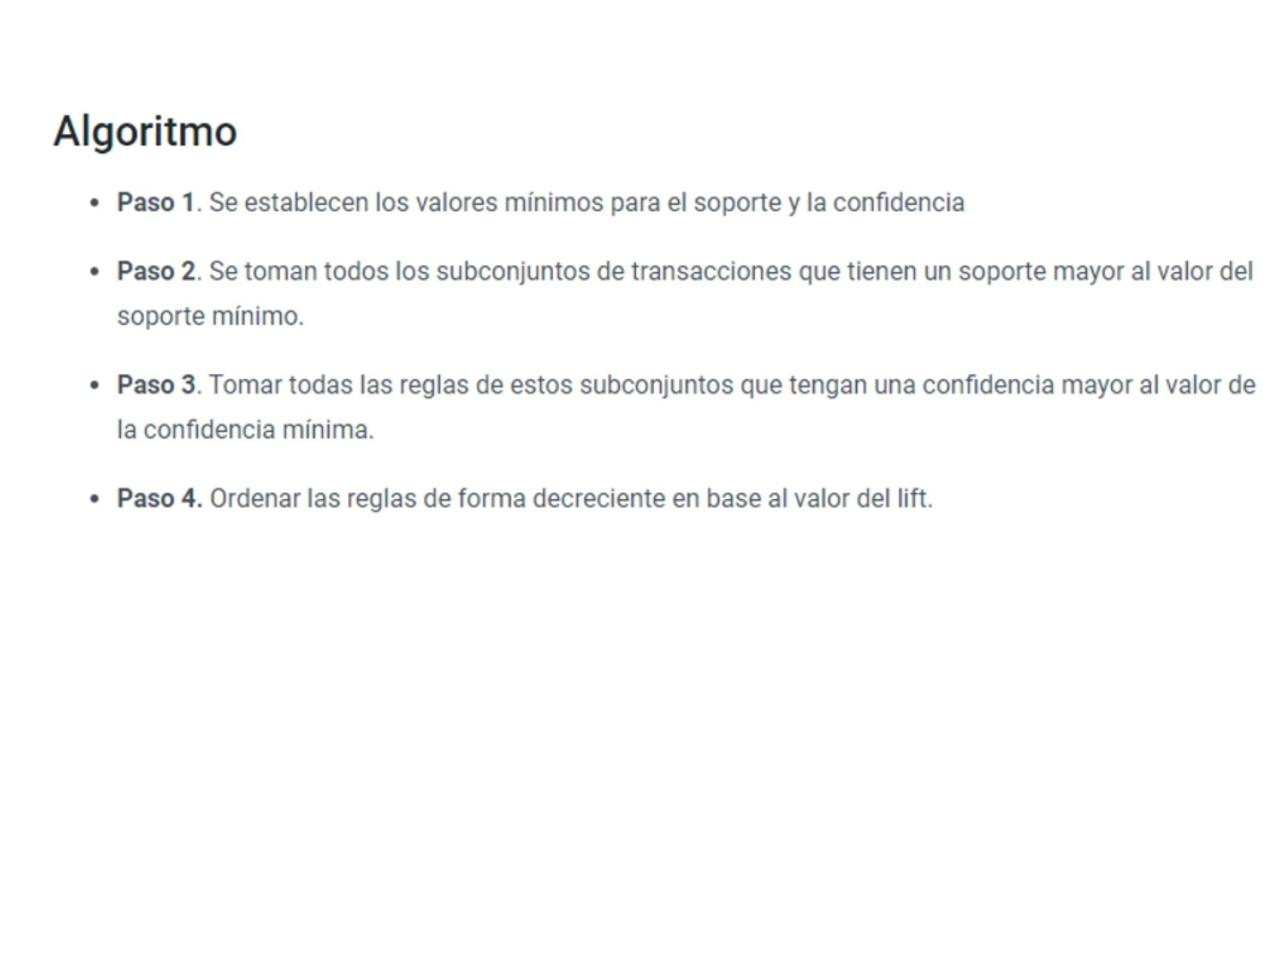

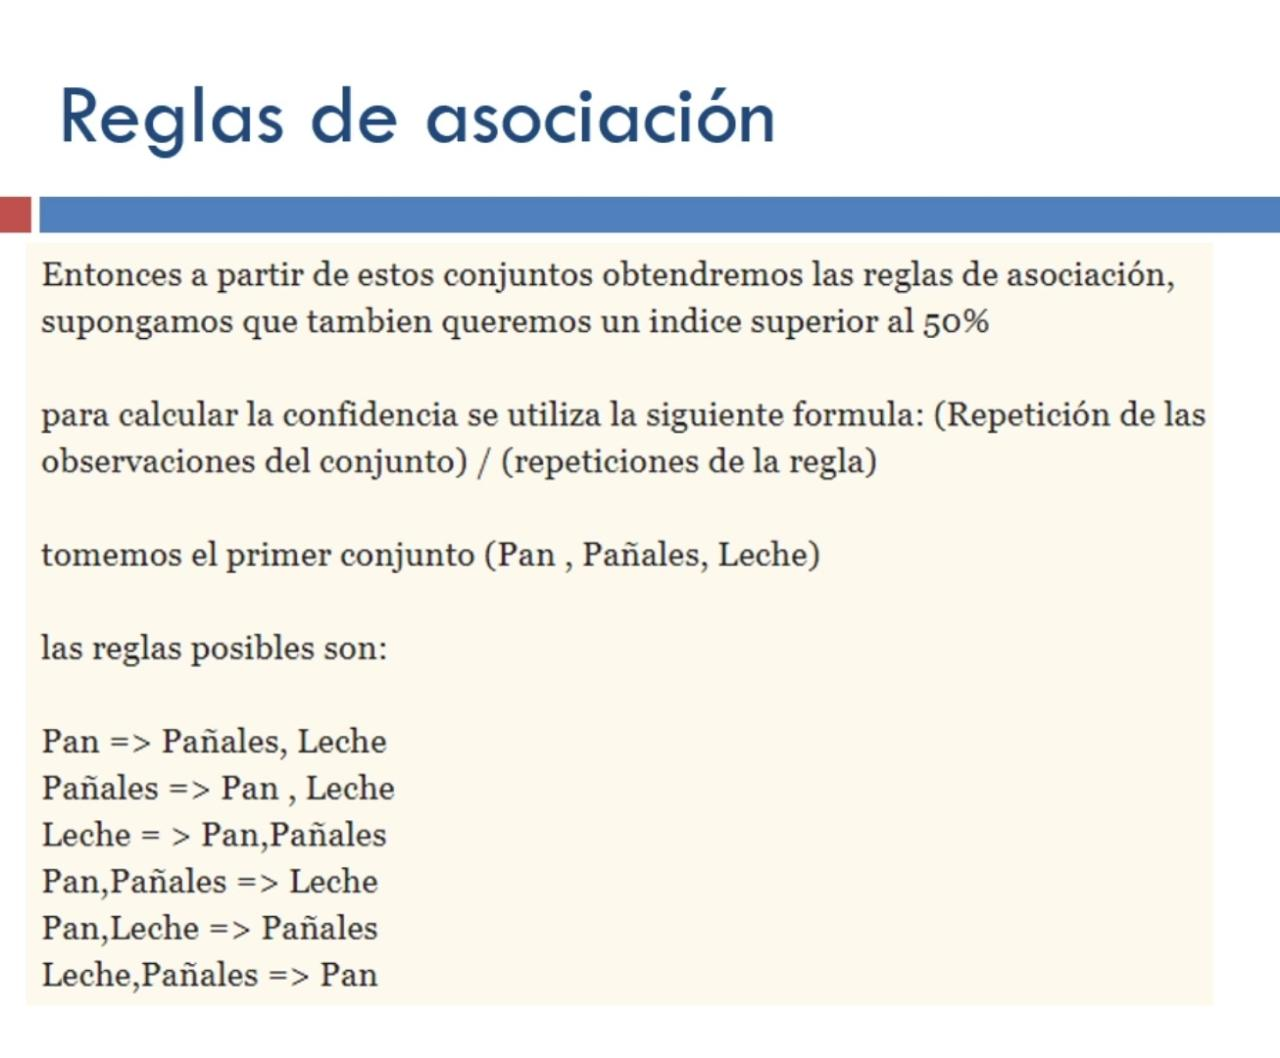

In [1]:
#implementacion del algoritmo apriori

#Admite un formato de salida JSON.
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=a5457ff443ecf5bb2ce667c098870f798302d2f9d64ea5ffebcbcd81a3e8c13f
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [ ]:
#librerias a usarse

#numpy: biblioteca para crear matrices y vectores
import numpy as np

#matploplib: usada generalmente para generar graficos a partir de ploteos
import matplotlib.pyplot as plt

#Pandas: Extension de numpy usada para analisis de datos
import pandas as pd
from apyori import apriori

In [5]:
#librerias a usarse

#numpy: biblioteca para crear matrices y vectores
import numpy as np
#Pandas: Extension de numpy usada para analisis de datos  
import pandas as pd  
from itertools import combinations
#matploplib: usada generalmente para generar graficos a partir de ploteos
import matplotlib.pyplot as plt
from apyori import apriori

In [6]:

#Importamos los datos de la db con load numpy
db =np.load('spotify.npy',allow_pickle=True)
#Transformamos a un iterable
R = db.tolist()
lista = [R[i] for i in R]
#tranformamos en un dataframe
dfSpotify = pd.DataFrame(lista)

In [7]:
dfSpotify

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249
0,Lose Control (feat. Ciara & Fat Man Scoop),Toxic,Crazy In Love,Rock Your Body,It Wasn't Me,Yeah!,My Boo,Buttons,Say My Name,Hey Ya! - Radio Mix / Club Mix,Promiscuous,Right Where You Want Me - Radio Edit Version,Beautiful Soul,Leavin',Me & U,Ice Box,Sk8er Boi,Run It!,Check On It - feat. Bun B and Slim Thug,"Jumpin', Jumpin'",Soak Up The Sun,Where Is The Love?,Stacy's Mom,Just The Girl,Yo (Excuse Me Miss),Year 3000,Lip Gloss,Everytime We Touch - Radio Edit,Whatcha Say,Miss Independent,Party In The U.S.A.,The Great Escape,Replay,Forever,Your Love Is My Drug,Closer,One Less Lonely Girl,Paper Planes,Mr. Brightside,All The Small Things,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Fathoms Below - Broadway Cast Recording,Daughters Of Triton - Broadway Cast Recording,The World Above - Broadway Cast Recording,Human Stuff - Broadway Cast Recording,I Want the Good Times Back - Broadway Cast Rec...,Part Of Your World,Storm at Sea - Broadway Cast Recording,Part Of Your World (Reprise) - Broadway Cast R...,She's in Love - Broadway Cast Recording,Her Voice - Broadway Cast Recording,The World Above (Reprise) - Broadway Cast Reco...,Under the Sea - Broadway Cast Recording,Under the Sea (Reprise) - Broadway Cast Recording,Sweet Child - Broadway Cast Recording,Poor Unfortunate Souls - Broadway Cast Recording,Positoovity - Broadway Cast Recording,Beyond My Wildest Dreams - Broadway Cast Recor...,One Step Closer - Broadway Cast Recording,I Want the Good Times Back (Reprise) - Broadwa...,Kiss the Girl - Broadway Cast Recording,Sweet Child (Reprise) - Broadway Cast Recording,If Only (Quartet) - Broadway Cast Recording,The Contest - Broadway Cast Recording,Poor Unfortunate Souls (Reprise) - Broadway Ca...,If Only (Reprise) - Broadway Cast Recording,Finale - Broadway Cast Recording,"Kiss the Girl - From ""The Little Mermaid""/Soun...","Poor Unfortunate Souls - From ""The Little Merm...","Part of Your World (Reprise) - From ""The Littl...","Under the Sea - From ""The Little Mermaid""/ Sou...","Part of Your World - From ""The Little Mermaid""...","Daughters of Triton - From ""The Little Mermaid...",Kiss the Girl,"Under the Sea - From ""The Little Mermaid""/ Sou...","Part of Your World - From ""The Little Mermaid""...","Poor Unfortunate Souls - From ""The Little Merm...","Kiss the Girl - From ""The Little Mermaid""/Soun...","Happy Ending - From ""The Little Mermaid""/ Soun...","Main Title - The Little Mermaid - From ""The Li...",Overture - Broadway Cast Recording,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,ABC,Point/Counterpoint,Billie Jean,Basket Case,Seven Nation Army,1985,Rollup - Baauer Remix,Dirt Off Your Shoulder,"So Ruff, So Tuff",Snow (Hey Oh) - Hey Oh Album Version,Werewolves Of London - 2007 Remastered Version,Two Princes,Jailhouse,Black Betty,Moar Ghosts 'n' Stuff,Acid Raindrops,Guns Are Drawn,Disco Inferno,Ignition - Remix,Life's Been Good,Black River Killer,Amazing,Young Americans - 2016 Remastered Version,Fame - 2016 Remastered Version,How We Do - Radio Edit,Never Say Goodbye - Radio Edit,Peace Frog,Animals - Extended,Fitzpleasure,Officer,The Message,Hey Brother,Hypnotize - 2014 Remastered Version,Big Poppa,Juicy,My Band,The Next Episode,Jessie's Girl,Feels Like the First Time - 2008 Remastered Ve...,Hot Blooded,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Non

In [8]:
#Verificamos si tenemos valores nulos
dfSpotify.isnull()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True,True,Tr

In [35]:
# Calculo de los datos de la longitud del dataframe convertido
Cant_records = len(dfSpotify)
# Mostramos la longitud
print(Cant_records)

10000


In [37]:
# Creamos un arreglo vacio para almacenar las transacciones
records = []
# Realizamos el recorrido con un for en la longitud del dataframe
for i in range(0,len(dfSpotify)):
  # Agregamos los valores de este en el arreglo vacion con la funcion append
  records.append([str(dfSpotify.values[i,j]) for j in range(0, 60)])


In [45]:
# Definimos nuestras reglas de asociacion
# Valores minimos que se pone en marcha en el algoritmo

#Establecemos la regla de asociacion,
# min_supp = minimo del soporte, min_confidence = minimo de la confianza, min_lift = minimo de sustentacion
regla_Asociacion = apriori(records, min_support=0.0053, min_confidence=0.5, min_lift=1.2, min_length=2)
#listamos la regla de asociacion
Result_Asociacion = list(regla_Asociacion)

In [46]:
#mostramos cuantas reglas de asociacion tenemos
print(len(Result_Asociacion))

35


In [47]:
#Hacemos experimentacion con una regla de la pos[1]
print(Result_Asociacion[1])

RelationRecord(items=frozenset({'All I Want for Christmas Is You', 'Have Yourself A Merry Little Christmas'}), support=0.0053, ordered_statistics=[OrderedStatistic(items_base=frozenset({'All I Want for Christmas Is You'}), items_add=frozenset({'Have Yourself A Merry Little Christmas'}), confidence=0.6385542168674698, lift=79.81927710843372), OrderedStatistic(items_base=frozenset({'Have Yourself A Merry Little Christmas'}), items_add=frozenset({'All I Want for Christmas Is You'}), confidence=0.6625, lift=79.81927710843374)])


In [67]:
# Recorremos cada item en todas las reglas encontrada
for item in Result_Asociacion:
  S = item[0]
  items =[x for x in S]
  # relaciones
  valor0= str(items[0])
  valor1= str(items[1])
  #soporte
  valor2= str(item[1])[:7]
  #confidencia
  valor3= str(item[2][0][2])[:7]
  #lift
  valor4= str(item[2][0][3])[:7]

  print("Regla: "+ items[0] + " ----> " + items[1])
  #SOPORTE: medida de interés para medir la calidad de las reglas de asociación
  print("Support: " + str(item[1])[:7])
  #CONFIANZA:  valor de correspondencia entre los ítems que componen una regla, es decir, la medida denota el porcentaje de transacciones que contienen
  #conjuntamente el término antecedente y el término consecuente en relación al número de
  #transacciones que contienen la parte antecedente.
  print("Confidence: "+str(item[2][0][2])[:7])
  #SUSTENTACION: medida de interés para analizar el grado de dependencia entre los elementos que conforman la regla.
  print("lift: "+str(item[2][0][3])[:7])
  print("")

  

Regla: 'Till I Collapse ----> Lose Yourself - Soundtrack Version
Support: 0.007
Confidence: 0.53030
lift: 39.2817

Regla: All I Want for Christmas Is You ----> Have Yourself A Merry Little Christmas
Support: 0.0053
Confidence: 0.63855
lift: 79.8192

Regla: Closer ----> All We Know
Support: 0.0053
Confidence: 0.55208
lift: 11.0860

Regla: Big Rings ----> Jumpman
Support: 0.0055
Confidence: 0.62499
lift: 30.0480

Regla: Knee Deep (feat. Jimmy Buffett) ----> Chicken Fried
Support: 0.0069
Confidence: 0.62162
lift: 39.3431

Regla: Chicken Fried ----> Toes
Support: 0.006
Confidence: 0.55555
lift: 35.1617

Regla: Closer ----> Cold Water (feat. Justin Bieber & MØ)
Support: 0.0091
Confidence: 0.55828
lift: 11.2104

Regla: Closer ----> Starving
Support: 0.0069
Confidence: 0.55199
lift: 11.0843

Regla: One Dance ----> Controlla
Support: 0.0075
Confidence: 0.51020
lift: 17.0636

Regla: DNA. ----> HUMBLE.
Support: 0.0115
Confidence: 0.78767
lift: 27.4449

Regla: H.O.L.Y. ----> Die A Happy Man
Suppo

# **ANALISIS DE REGLAS ESCOGIDAS**



# **PRIMERA REGLA ELEGIDA**


*   Regla: XO TOUR Llif3 ----> HUMBLE.
*   Support: 0.0109
*   Confidence: 0.55329
*   lift: 19.2787


*Esta regla fue la que tuve la mayor soporte, esto debido a que las canciones se encuentra en mas playlist que otras.*


# **SEGUNDA REGLA ELEGIDA**


*   Regla: DNA. ----> HUMBLE.
*   Support: 0.0115
*   Confidence: 0.78767
*   lift: 27.4449

*Esta regla fue la que tuve la que mejor confianza tuvo, esto implica que ambas existe una gran cantidad de la cancion DNA en las playlist y que dentro de estas en las que solo hay  playlist que contengan la cancion DNA se encuentra la cancion Humble.*

# **TERCERA REGLA ELEGIDA**


*   Regla: Closer ----> Starving
*   Support: 0.0069
*   Confidence: 0.55199
*   lift: 11.0843



*Esta regla es la que menor sustento tiene, esto equivale a decir que tanto el soporte como la confianza(ambas son directamente proporcionales) tienen tambien un bajo soporte y confidencia. en cuanto a la relacion de las dos canciones, no tienen nada en comun, ambos son de distinto genero y artista, closer es dance/electronica, interpretado por: Halsey; mientras que starving es de tipo pop, Intrepretado por: Hailee Steinfeld, Grey*

Regla: Have Yourself A Merry Little Christmas ----> It's Beginning To Look A Lot Like Christmas
Support: 0.0054
Confidence: 0.675
lift: 93.7500

#### Esta regla es la qe tiene mayor sustento, estoq quiere decir que en relacion al soporte y confidencia, es la que mayor porcentaje dio, ambas canciones tiene relacion a los titulos en cancioes, pero no en artistas.


# **CUARTA REGLA ELEGIDA**


* Regla: Have Yourself A Merry Little Christmas ----> It's Beginning To Look A Lot Like Christmas
* Support: 0.0054
* Confidence: 0.675
* lift: 93.7500


Esta regla es la qe tiene mayor sustento, estoq quiere decir que en relacion al soporte y confidencia, es la que mayor porcentaje dio, ambas canciones tiene relacion a los titulos en cancioes, pero no en artistas 